# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [5]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST',
    'AVG_MATH_4_SCORE': "AVG_MATH_4",
    'AVG_MATH_8_SCORE': "AVG_MATH_8",
    'AVG_READING_4_SCORE': "AVG_READING_4",
    'AVG_READING_8_SCORE': "AVG_READING_8"

    },
    # CHANGED THE AVG SCORE COLUMNS DO DISCLUDE SCORE
    axis=1,inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4,AVG_MATH_8,AVG_READING_4,AVG_READING_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

Grade 4 Reading

How many years of data are logged in our dataset? 

In [6]:
# 1986-2019 -> 33 years
print(df['YEAR'].nunique())


33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [16]:
print(df.groupby('STATE')["AVG_READING_4"].mean()['MICHIGAN'])
print(df.groupby('STATE')["AVG_READING_4"].mean()['OHIO'])
# Ohio Has the higher average score across all years

217.83333333333334
223.1818181818182


Find the average for your chosen test across all states in 2019

In [21]:
print(df.groupby('YEAR')['AVG_READING_4'].mean()[2019])

219.79245283018867


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [22]:
df.groupby('STATE')['AVG_READING_4'].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [37]:
#CLEANING UP SOME DATA, USED FROM TUTORIAL
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df['INSTRUCTION_EXP_FRACTION'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df['INSTRUCTION_EXP_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4,AVG_MATH_8,AVG_READING_4,AVG_READING_8,INSTRUCTION_EXP_PER_STUDENT,INSTRUCTION_EXP_FRACTION
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,0.558333
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,4.068693,0.512461
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,0.422130
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,0.553248
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,0.529091


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I added instruction expenditure per total expensiture and instruction expenditure per student as features. These are both things that are fairly regularized, and they show how much the state is putting effort towards investing in students. I feel like this could be correlated with the students reading scores. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

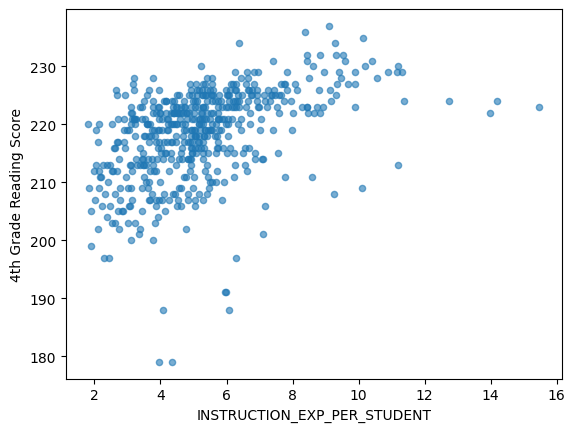

In [39]:
df.plot.scatter(x='INSTRUCTION_EXP_PER_STUDENT', y='AVG_READING_4', alpha=0.6)
plt.xlabel('INSTRUCTION_EXP_PER_STUDENT')
plt.ylabel('4th Grade Reading Score')

It looks like they are positivley correlated slightly, meaning high instruction expenditure per student means higher 4th grade reading score. However there are certainly some outliers where the correlation doesn't apply. 

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

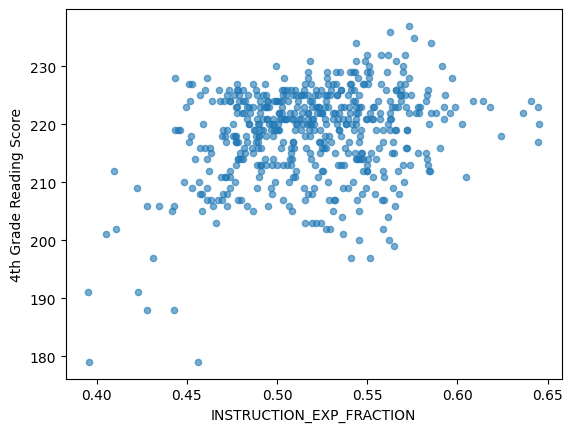

In [40]:
df.plot.scatter(x='INSTRUCTION_EXP_FRACTION', y='AVG_READING_4', alpha=0.6)
plt.xlabel('INSTRUCTION_EXP_FRACTION')
plt.ylabel('4th Grade Reading Score')

Once again, it certainly seems that there is a slight positive correlation. Meaning a higher instruction expenditure fraction is a slightly higher 4th grade reading score but the correlation here is very weak. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [44]:
from sklearn.model_selection import train_test_split

In [48]:
X = df[['INSTRUCTION_EXP_PER_STUDENT','AVG_MATH_4','AVG_READING_8']].dropna()
y = df.loc[X.index]['AVG_READING_4']
y.fillna(y.median(), inplace=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [53]:
# import your sklearn class here
from sklearn.svm import LinearSVR


In [54]:
# create your model here
model = LinearSVR(loss='squared_epsilon_insensitive', random_state=42, dual='auto')

In [55]:
model.fit(X_train, y_train)

LinearSVR(dual='auto', loss='squared_epsilon_insensitive', random_state=42)

In [56]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [62]:
print(model.intercept_)
print(model.coef_)
# R^2 value describes how well a linear model fits the data
print(model.score(X_test, y_test))
# mean error
print(np.mean(y_pred-y_test))
# mean absolute error
print(np.mean(np.abs(y_pred-y_test)))
# root mean squared error -- penalizes large errors
print(np.mean((y_pred-y_test)**2)**0.5)
# mean absolute percentage error
print(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

[0.00173703]
[0.01042698 0.41508581 0.45759636]
0.8149827760682986
-0.282121179449425
2.2883594165498056
2.744246028146487
1.038595228235393


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

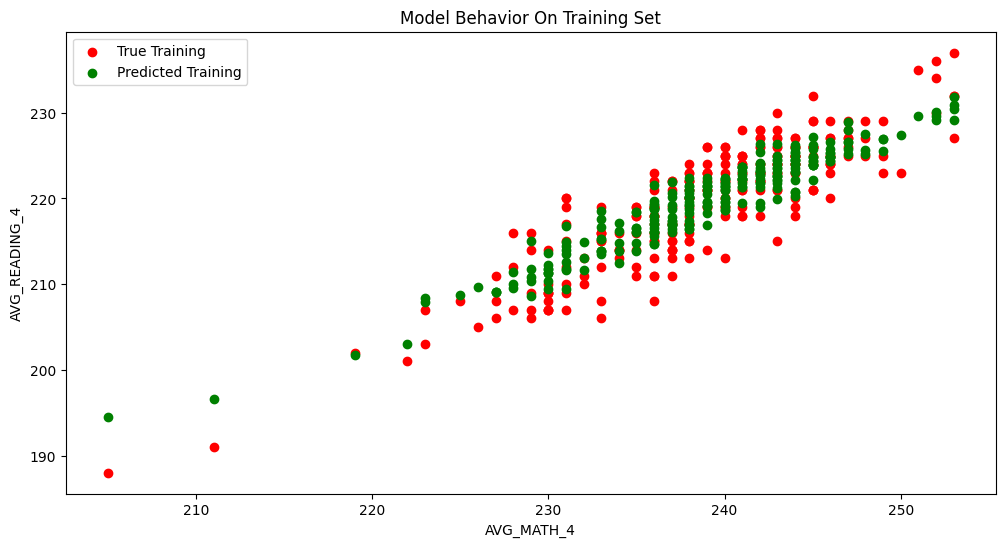

In [68]:
col_name = 'AVG_MATH_4'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

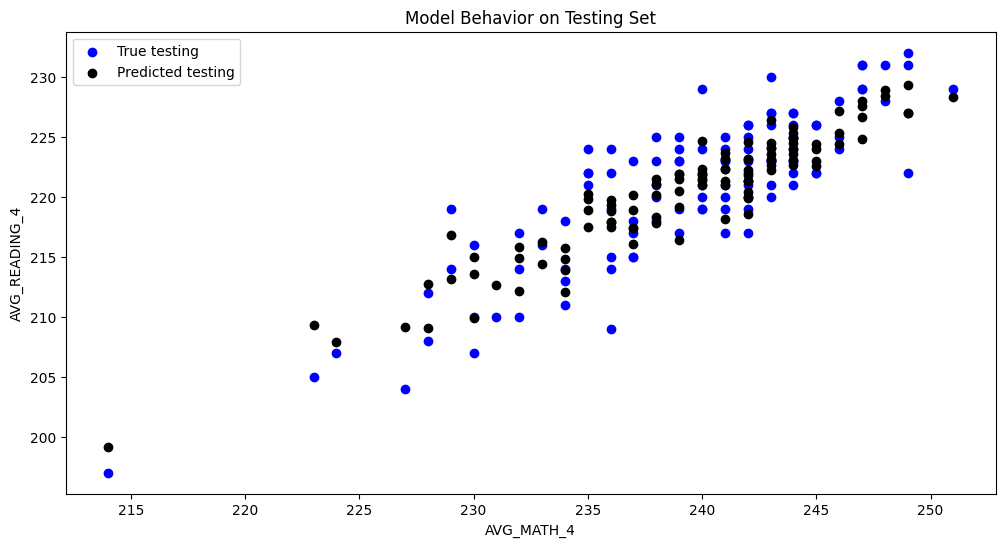

In [69]:
col_name = 'AVG_MATH_4'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I started out using similar techniques to tutorial 1 to clean up the data. I renamed some the columns the same way that the tutorial 1 did and also changed the average score columns to not include score and just include AVG_SUBJECT_GRADE. I used the same techniques (using the enrollment of each group of grades to use as the enrollment total, and using the enrollment all as the enrollment estimate) as tutorial 1 as well to fix the data that was not filled. I then added two features that I thought would be interesting. I added the instruction expenditure per student and instruction expenditure fraction (fraction compared to total expenditure). I thought that the total expenditure relative to each student could help show how much the state was spending on education comparitvley, and I thought the expenditure fraction could show in a different way how much the state was willing to spend on education. I was hoping that this would be a strong correlation to the 4th grade reading score, which is what I was trying to predict. Unfortunatley, I saw it was positivley correlated with both of them but not too strongly. I ended up using the expenditure per student for my model to predict the 4th grade reading score as I thought the correlation was impactful enough. I also used the AVG_MATH_4 and AVG_MATH_8 as I thought these could be good predictors of the 4th grade test. Hoping that test scores within the same year are somewhat correlated positivley. I then chose to use a LinearSVR model, this is because I know support vector machines are very powerful from EECS 445, so I thought I would use the regression version. I ended up also using squared_epsilon_insensitive loss as this would penalize larger errors more. This model did very similarly to the model from tutorial 1. I used one different metric which was mean absolute percentage error and found my model was only about 1 percent off. This was pretty good, so I believe my model did well. I looked at the visualization of how my model did relative to its AVG_MATH_4 column and it seems that the predicted 4th grade score and the actual 4th grade score were very similar. I think my model did a little bit of overfitting and I could consider not using squared loss in the future. 